In [ ]:
#from textblob import TextBlob
import pandas as pd
import re, string
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install top2vec
!pip install top2vec[sentence_transformers]
!pip install top2vec[sentence_encoders]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !pip install pyLDAvis

In [ ]:
# # libraries for visualization
# import pyLDAvis
# import pyLDAvis.gensim
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
review_data = pd.read_csv('/content/drive/MyDrive/Amazon reviews/sample_data_for_topic_modelling.csv')

#**Data pre-processing**

In [ ]:
review_data

Unnamed: 0.1  Unnamed: 0      ID  \
0                30          30      31   
1               131         131     132   
2               167         167     168   
3               226         226     227   
4               292         292     293   
...             ...         ...     ...   
25124        713736      713736  713737   
25125        713753      713753  713754   
25126        713779      713779  713780   
25127        713786      713786  713787   
25128        713800      713800  713801   

                                        Subject  \
0                           Planet App Feedback   
1      L&T Financial Services - General Enquiry   
2                                Loan not clear   
3      L&T Financial Services - General Enquiry   
4                          LAN C022122501011708   
...                                         ...   
25124  L&T Financial Services - General Enquiry   
25125                       Planet App Feedback   
25126                       Planet App Feedback   
25127  L&T Financial Services - General Enquiry   
25128                       Planet App Feedback   

                                             Description  sub_words_count  \
0      Very poor customer service no response from yo...                3   
1      Two wheeler loan still not update\n\n-- \nDisc...                6   
2      NAME - NARMADA DAS\nMOBILE NO - 9678183958\nLO...                3   
3      Dear Team,\n\n\nI have already paid the emi of...                6   
4      Dear Sir/Madam,\n\nI have taken loan from you ...                2   
...                                                  ...              ...   
25124  sending email my DOB is wrong plz give me opti...                6   
25125      Services, Unable to update Mobile no./Address                3   
25126                              I'm a zero experience                3   
25127  sending email my name is jaskaran Singh my loa...                6   
25128         Technical, Unable to update to new version                3   

       sub_char_count  desc_words_count  desc_char_count  \
0                  19                21              143   
1                  40               176             1115   
2                  14               205             1265   
3                  40               214             1355   
4                  20               258             1571   
...               ...               ...              ...   
25124              40               182             1142   
25125              19                 6               45   
25126              19                 4               21   
25127              40               344             1988   
25128              19                 7               42   

                                            Cleaned_Desc  ...  desc_score  \
0      Very poor customer service no response from yo...  ...      0.9392   
1                     Two wheeler loan still not update   ...      0.6240   
2      NAME NARMADA DAS MOBILE NO LOAN NO C I have pa...  ...      0.6760   
3      Dear Team I have already paid the emi of rd Ja...  ...      0.4921   
4      Dear Sir Madam I have taken loan from you but ...  ...      0.7081   
...                                                  ...  ...         ...   
25124  sending email my DOB is wrong plz give me opti...  ...      0.6904   
25125        Services Unable to update Mobile no Address  ...      0.7875   
25126                              I'm a zero experience  ...      0.7380   
25127  sending email my name is jaskaran Singh my loa...  ...      0.7044   
25128          Technical Unable to update to new version  ...      0.7007   

       desc_sentiment              Date/Time Opened  Case Category  \
0            negative  2022-12-31T19:12:39.000+0000       Feedback   
1            negative  2022-12-31T19:49:36.000+0000          Query   
2            negative  2022-12-31T20:07:44.000+0000          Query   
3            negative  202

In [ ]:
#print('Number of unique reviews:', review_data['Text'].nunique())
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25129 entries, 0 to 25128
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0.1              25129 non-null  int64  
 1   Unnamed: 0                25129 non-null  int64  
 2   ID                        25129 non-null  int64  
 3   Subject                   24794 non-null  object 
 4   Description               25129 non-null  object 
 5   sub_words_count           25129 non-null  int64  
 6   sub_char_count            25129 non-null  int64  
 7   desc_words_count          25129 non-null  int64  
 8   desc_char_count           25129 non-null  int64  
 9   Cleaned_Desc              25129 non-null  object 
 10  cleaned_desc_words_count  25129 non-null  int64  
 11  subject_score             25129 non-null  float64
 12  subject_sentiment         25129 non-null  object 
 13  desc_score                25129 non-null  float64
 14  desc_s

In [ ]:
#this function will remove special characters, digits and words having characters less than or equal to three
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join(textArr) 
    
    return text2.lower()

In [ ]:
# review_data.dropna(axis = 0, how ='any',inplace=True) 
review_data['Cleaned_Desc'] = review_data['Cleaned_Desc'].apply(clean_text)
# review_data['Num_words_text'] = review_data['Text'].apply(lambda x:len(str(x).split())) 

# print('-------Dataset --------')
# print(review_data['Score'].value_counts())
# print('-------------------------')
# # max_review_data_sentence_length  = review_data['Num_words_text'].max()

# mask = (review_data['Num_words_text'] < 30) & (review_data['Num_words_text'] >=5)
# df_short_reviews = review_data[mask]

# #sample only 5000 instances for each value of score, in total 5*5000 instances
# df_sampled = df_short_reviews.groupby('Score').apply(lambda x: x.sample(n=5000)).reset_index(drop = True)

# print('No of Short reviews')
# print(len(df_short_reviews))

In [ ]:
review_data

Unnamed: 0.1  Unnamed: 0      ID  \
0                30          30      31   
1               131         131     132   
2               167         167     168   
3               226         226     227   
4               292         292     293   
...             ...         ...     ...   
25124        713736      713736  713737   
25125        713753      713753  713754   
25126        713779      713779  713780   
25127        713786      713786  713787   
25128        713800      713800  713801   

                                        Subject  \
0                           Planet App Feedback   
1      L&T Financial Services - General Enquiry   
2                                Loan not clear   
3      L&T Financial Services - General Enquiry   
4                          LAN C022122501011708   
...                                         ...   
25124  L&T Financial Services - General Enquiry   
25125                       Planet App Feedback   
25126                       Planet App Feedback   
25127  L&T Financial Services - General Enquiry   
25128                       Planet App Feedback   

                                             Description  sub_words_count  \
0      Very poor customer service no response from yo...                3   
1      Two wheeler loan still not update\n\n-- \nDisc...                6   
2      NAME - NARMADA DAS\nMOBILE NO - 9678183958\nLO...                3   
3      Dear Team,\n\n\nI have already paid the emi of...                6   
4      Dear Sir/Madam,\n\nI have taken loan from you ...                2   
...                                                  ...              ...   
25124  sending email my DOB is wrong plz give me opti...                6   
25125      Services, Unable to update Mobile no./Address                3   
25126                              I'm a zero experience                3   
25127  sending email my name is jaskaran Singh my loa...                6   
25128         Technical, Unable to update to new version                3   

       sub_char_count  desc_words_count  desc_char_count  \
0                  19                21              143   
1                  40               176             1115   
2                  14               205             1265   
3                  40               214             1355   
4                  20               258             1571   
...               ...               ...              ...   
25124              40               182             1142   
25125              19                 6               45   
25126              19                 4               21   
25127              40               344             1988   
25128              19                 7               42   

                                            Cleaned_Desc  ...  desc_score  \
0      very poor customer service no response from yo...  ...      0.9392   
1                      two wheeler loan still not update  ...      0.6240   
2      name narmada das mobile no loan no c i have pa...  ...      0.6760   
3      dear team i have already paid the emi of rd ja...  ...      0.4921   
4      dear sir madam i have taken loan from you but ...  ...      0.7081   
...                                                  ...  ...         ...   
25124  sending email my dob is wrong plz give me opti...  ...      0.6904   
25125        services unable to update mobile no address  ...      0.7875   
25126                               im a zero experience  ...      0.7380   
25127  sending email my name is jaskaran singh my loa...  ...      0.7044   
25128          technical unable to update to new version  ...      0.7007   

       desc_sentiment              Date/Time Opened  Case Category  \
0            negative  2022-12-31T19:12:39.000+0000       Feedback   
1            negative  2022-12-31T19:49:36.000+0000          Query   
2            negative  2022-12-31T20:07:44.000+0000          Query   
3            negative  202

$\Large\text{As can be seen from the above result that special charcters, stopwords, digits are removed from the text.}$

In [ ]:
!pip uninstall numba

Found existing installation: numba 0.57.0
Uninstalling numba-0.57.0:
  Would remove:
    /usr/local/bin/numba
    /usr/local/lib/python3.10/dist-packages/numba-0.57.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numba/*
Proceed (Y/n)? Y
  Successfully uninstalled numba-0.57.0


In [ ]:
!pip install numba --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numba-0.57.0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.6 MB)


In [ ]:
from top2vec import Top2Vec

In [ ]:
model = Top2Vec(review_data.Cleaned_Desc.values, embedding_model='universal-sentence-encoder')

2023-05-23 08:05:14,019 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-05-23 08:05:17,535 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-05-23 08:05:52,873 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-05-23 08:06:03,550 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-05-23 08:07:09,436 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-05-23 08:07:12,656 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
model.get_num_topics()

320

In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [ ]:
print(topic_sizes)

[828 823 792 602 557 479 447 437 381 349 344 332 331 325 314 309 273 259
 219 219 204 189 185 184 179 177 172 169 168 161 160 156 154 152 152 139
 139 133 127 127 125 121 119 118 113 113 113 108 106 105 104 103 103 101
 100 100  99  97  94  93  93  92  90  89  89  89  89  89  87  87  86  86
  85  85  84  84  84  83  82  82  82  80  78  78  77  76  75  75  73  72
  72  71  71  69  69  67  67  67  67  67  66  64  64  64  63  63  62  61
  61  60  60  58  58  58  58  57  57  57  57  56  56  56  55  54  54  54
  54  54  53  53  53  51  51  51  51  50  50  50  49  49  49  48  48  48
  47  47  47  47  47  47  47  47  47  46  45  45  45  45  44  44  44  44
  44  44  44  44  44  43  43  43  43  43  42  41  41  41  41  41  41  40
  40  40  40  39  39  39  39  39  39  39  39  39  38  38  38  36  36  36
  36  36  36  36  36  36  35  35  35  35  34  34  34  34  34  33  33  33
  33  33  33  32  32  32  32  32  32  32  32  31  31  31  31  31  31  31
  30  30  30  30  30  30  30  30  30  29  29  29  2

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(320)

In [ ]:
print(word_scores)

[[0.54853773 0.42712587 0.35027826 ... 0.1951988  0.19352512 0.19342071]
 [0.3882422  0.31942236 0.31862092 ... 0.14561537 0.1449943  0.14469333]
 [0.67676836 0.5206884  0.50698435 ... 0.2980873  0.29622027 0.2943042 ]
 ...
 [0.2941614  0.26368147 0.24926913 ... 0.12898976 0.12876825 0.12809505]
 [0.2677102  0.24913786 0.2440311  ... 0.12274759 0.12059765 0.12008458]
 [0.2514569  0.24363928 0.24069256 ... 0.12989897 0.1289056  0.12877847]]


In [ ]:
print(topic_words)

[['loan' 'loans' 'closing' ... 'closed' 'sorry' 'handover']
 ['call' 'responding' 'respond' ... 'customers' 'wait' 'looping']
 ['dropped' 'drop' 'callcall' ... 'abusing' 'vidyasagar' 'takeover']
 ...
 ['customer' 'foreclosure' 'foreclose' ... 'dob' 'refund' 'closing']
 ['transferred' 'barrier' 'laxmi' ... 'closing' 'kgl' 'linked']
 ['customer' 'problem' 'disconnected' ... 'unsuccessful' 'reason'
  'requesting']]


In [ ]:
for i in range(318):
  print("\033[1m"+'Topic', i, "\033[0m", topic_words[i])

Topic 0  ['loan' 'loans' 'closing' 'foreclosure' 'close' 'please' 'kindly' 'dear'
 'foreclose' 'ready' 'cibil' 'repayment' 'closure' 'overdue' 'credit'
 'waiting' 'attention' 'emi' 'pls' 'stop' 'plz' 'call' 'remove'
 'requesting' 'surrender' 'warning' 'hdfc' 'foreclosed' 'icici' 'regards'
 'calling' 'installment' 'want' 'interest' 'missed' 'penalty' 'urgent'
 'requested' 'paying' 'calls' 'contact' 'cheque' 'disbursement'
 'greetings' 'pending' 'ignore' 'reminder' 'closed' 'sorry' 'handover']
Topic 1  ['call' 'responding' 'respond' 'calls' 'response' 'ignore' 'drop' 'reply'
 'calling' 'cancelled' 'demand' 'dropped' 'cust' 'end' 'asks'
 'disconnected' 'customer' 'asked' 'return' 'requesting' 'complaint'
 'rejected' 'cancel' 'answer' 'ask' 'escalate' 'closing' 'complain'
 'refund' 'waiting' 'request' 'go' 'queries' 'overdue' 'told' 'delay'
 'asking' 'closure' 'say' 'ivr' 'tell' 'claim' 'pending' 'foreclose'
 'called' 'irate' 'bounced' 'customers' 'wait' 'looping']
Topic 2  ['dropped' 'dro

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["registration"], num_topics=19)

In [ ]:
topic_nums

array([ 57,   9, 242,  22,  12,  59,  48,  64, 227, 268, 305, 297,  46,
       204, 220, 201,  82,  18, 150])

In [ ]:
topic_scores

array([0.5472014 , 0.38545434, 0.37426714, 0.32981322, 0.30855145,
       0.30351155, 0.29158653, 0.23795018, 0.23209858, 0.21069559,
       0.20986652, 0.20986198, 0.20866304, 0.19493242, 0.18852561,
       0.1860429 , 0.18466643, 0.16971701, 0.16536697])

In [ ]:
topic_words

[array(['registration', 'login', 'register', 'registered', 'connect',
        'account', 'password', 'failed', 'disconnected', 'verification',
        'error', 'cibil', 'validation', 'unable', 'cannot', 'expired',
        'problem', 'trying', 'fraud', 'emi', 'id', 'salesforce', 'sbi',
        'issue', 'formalities', 'disconnect', 'dob', 'overdue',
        'foreclosure', 'waiting', 'loan', 'foreclose', 'incorrect',
        'reason', 'difficult', 'january', 'laxmi', 'form', 'applying',
        'enquiry', 'certificate', 'issues', 'handover', 'wrongly', 'ready',
        'hdfc', 'application', 'pvt', 'wrong', 'slow'], dtype='<U15'),
 array(['mandate', 'registration', 'failed', 'service', 'unsuccessful',
        'services', 'registered', 'tenure', 'register', 'term',
        'harassment', 'foreclosure', 'approval', 'validation', 'waiver',
        'nominee', 'overdue', 'formalities', 'unable', 'cancelled',
        'expired', 'permission', 'dues', 'surrender', 'verification',
        'departme

topic_words: For each topic the top 50 words are returned, in order of semantic similarity to topic.

word_scores: For each topic the cosine similarity scores of the top 50 words to the topic are returned.

topic_scores: For each topic the cosine similarity to the search keywords will be returned.

topic_nums: The unique index of every topic will be returned.

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["jhand"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=17, num_docs=15)

In [ ]:
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

documents: The documents in a list, the most similar are first.

doc_scores: Semantic similarity of document to topic. The cosine similarity of the document and topic vector.

doc_ids: Unique ids of documents. If ids were not given, the index of document in the original corpus

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["delicious", "food"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

In [ ]:
words, word_scores = model.similar_words(keywords=["registration"], keywords_neg=[], num_words=30)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

register 0.8259491100461234
registered 0.7711503561217472
login 0.5665985614432041
file 0.48400702148624886
post 0.4749510249610199
receipt 0.46813339728343195
checked 0.4634636078527008
password 0.45851889502676946
form 0.4553308944178406
verification 0.45394739740455525
validation 0.45118895129431297
acknowledgement 0.44851755013355565
page 0.4460314413933425
certificate 0.4453918505306029
account 0.4452639729281537
id 0.44522292617062115
data 0.4397679255302585
list 0.43485784422617335
check 0.43372377877130697
nov 0.43275111274847505
service 0.4324271799016592
transfer 0.4308266314439889
application 0.42896452994740436
year 0.4249449627296854
issued 0.4214661205226275
address 0.4213341166301141
document 0.42061503917550885
claim 0.41862095273808714
nominee 0.41842969027573507
pvt 0.4184076519058214


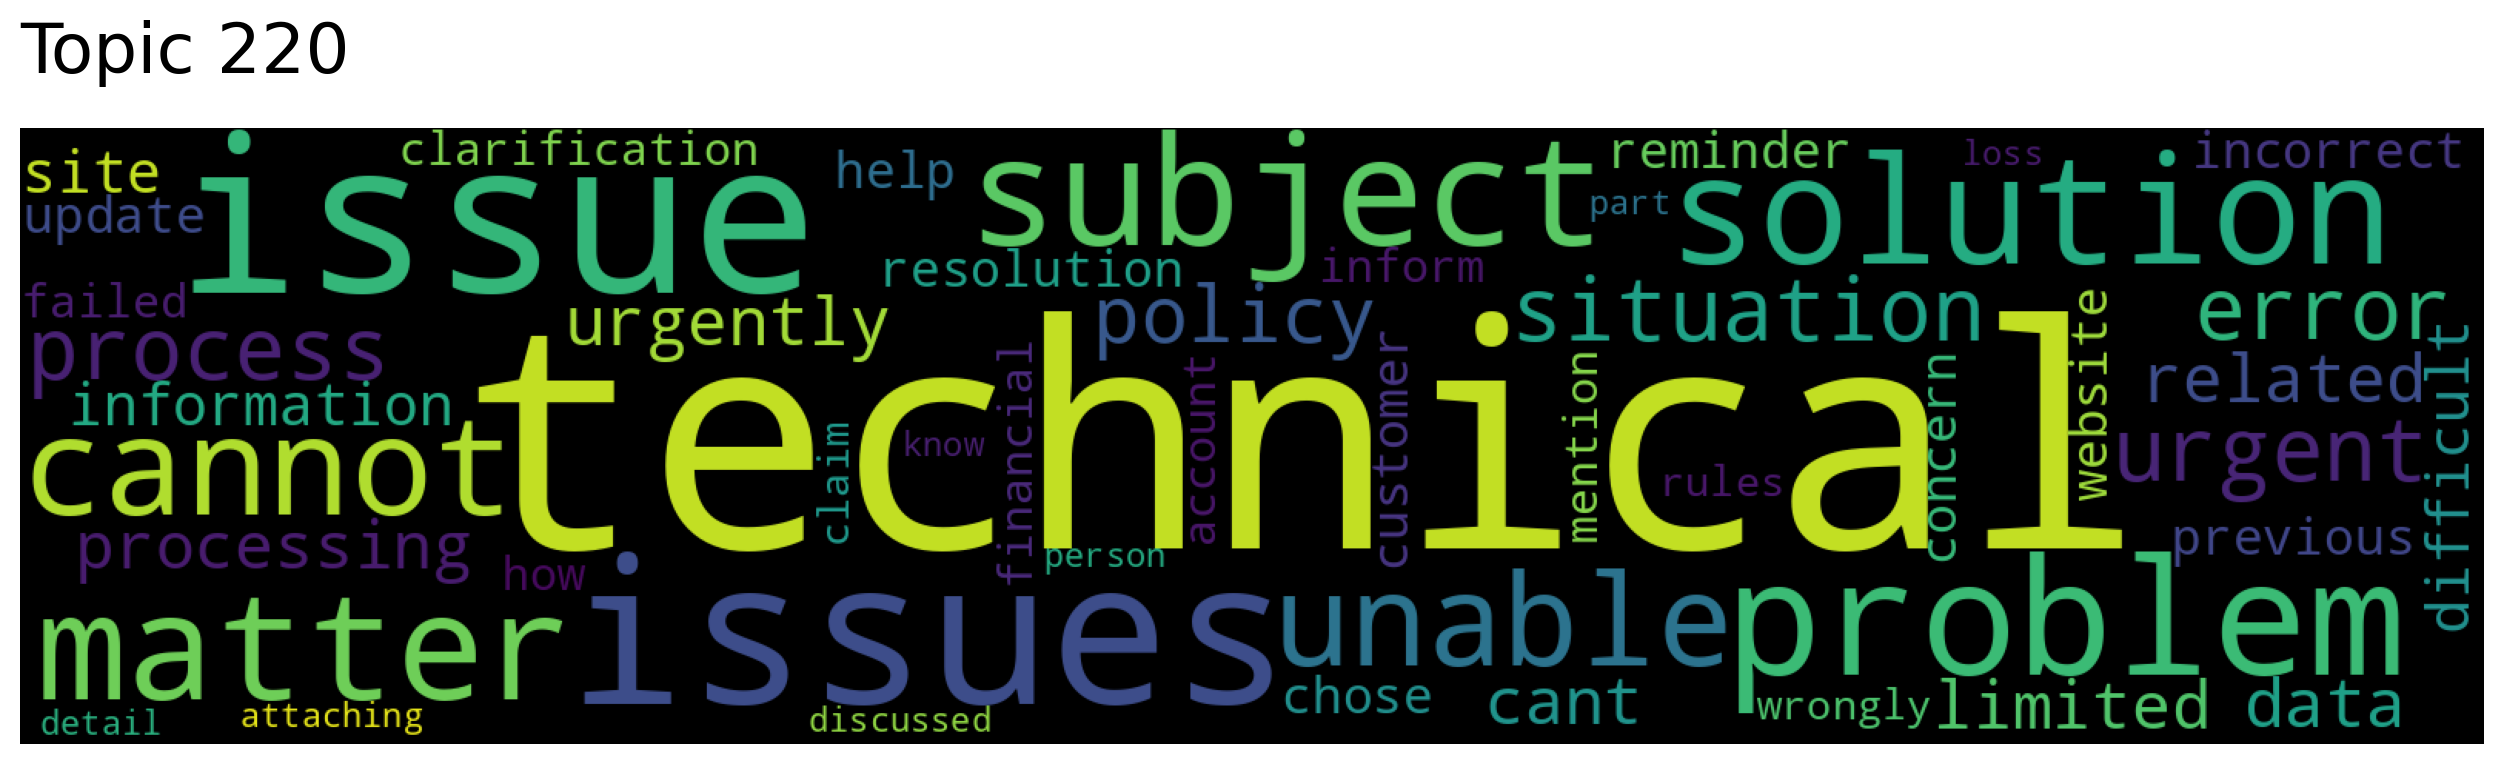

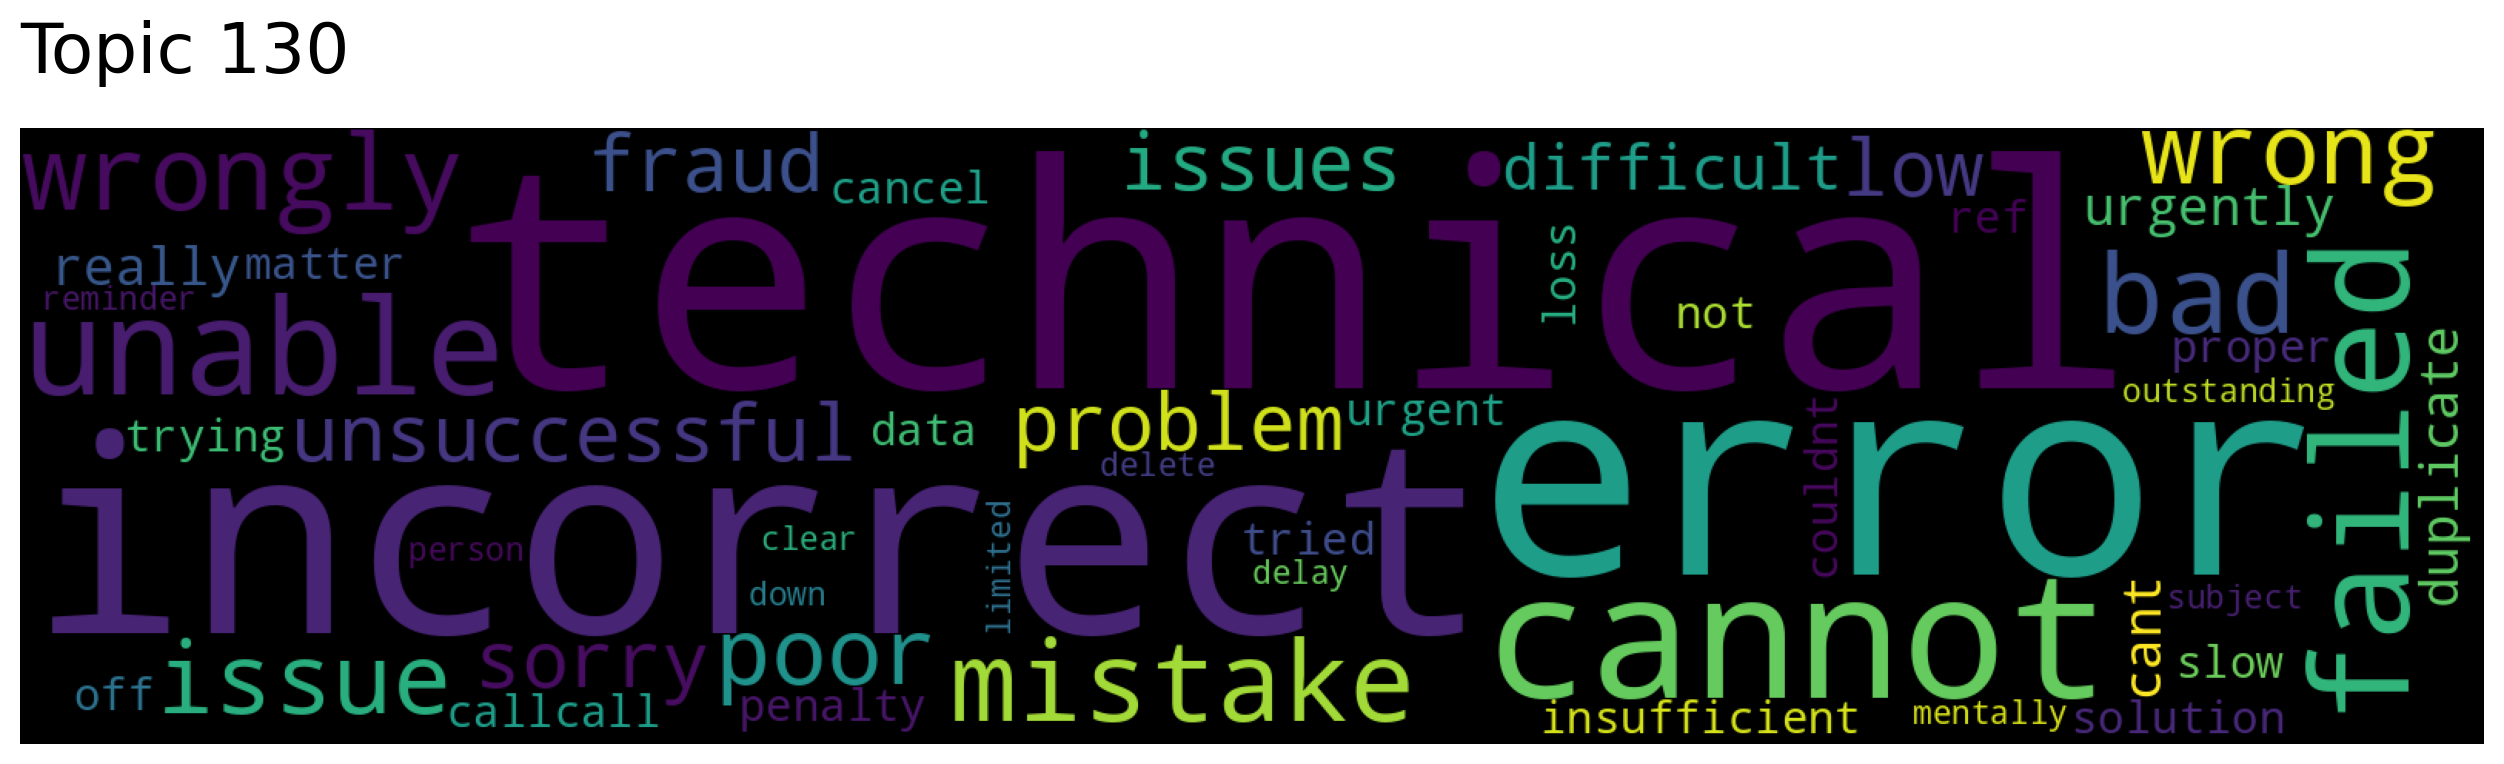

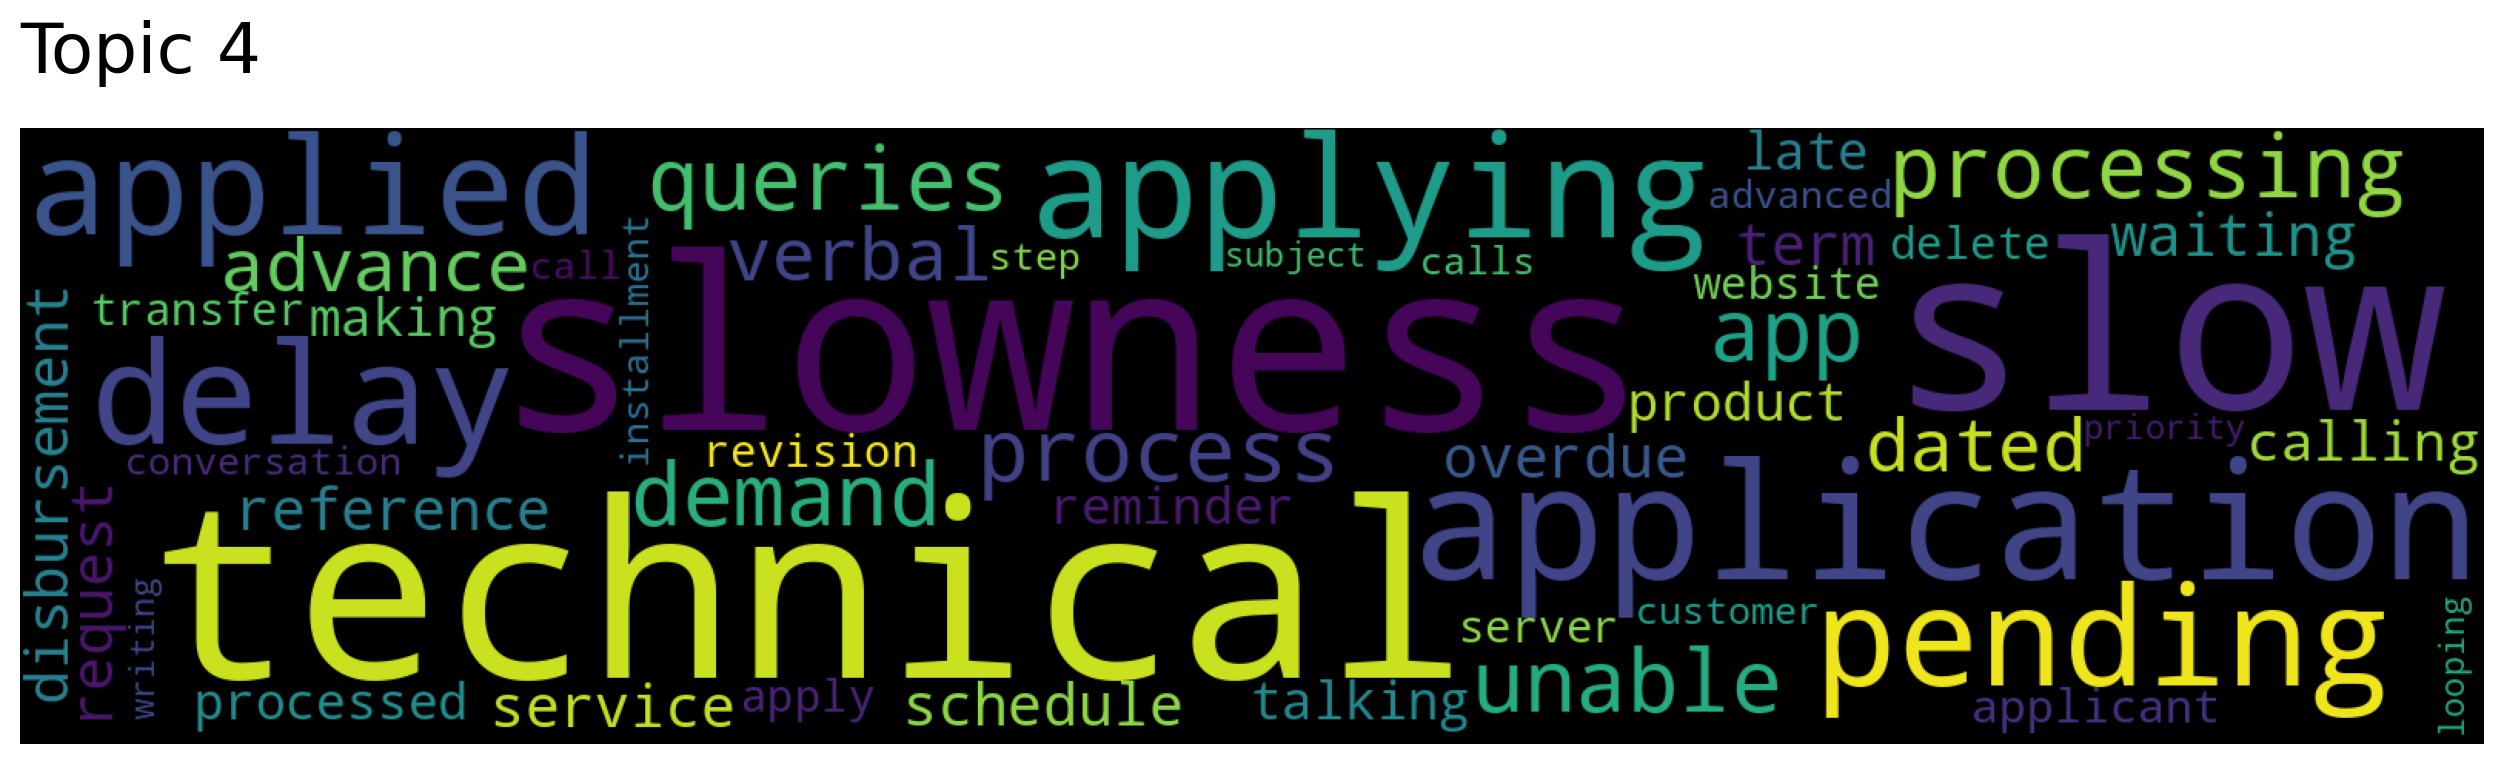

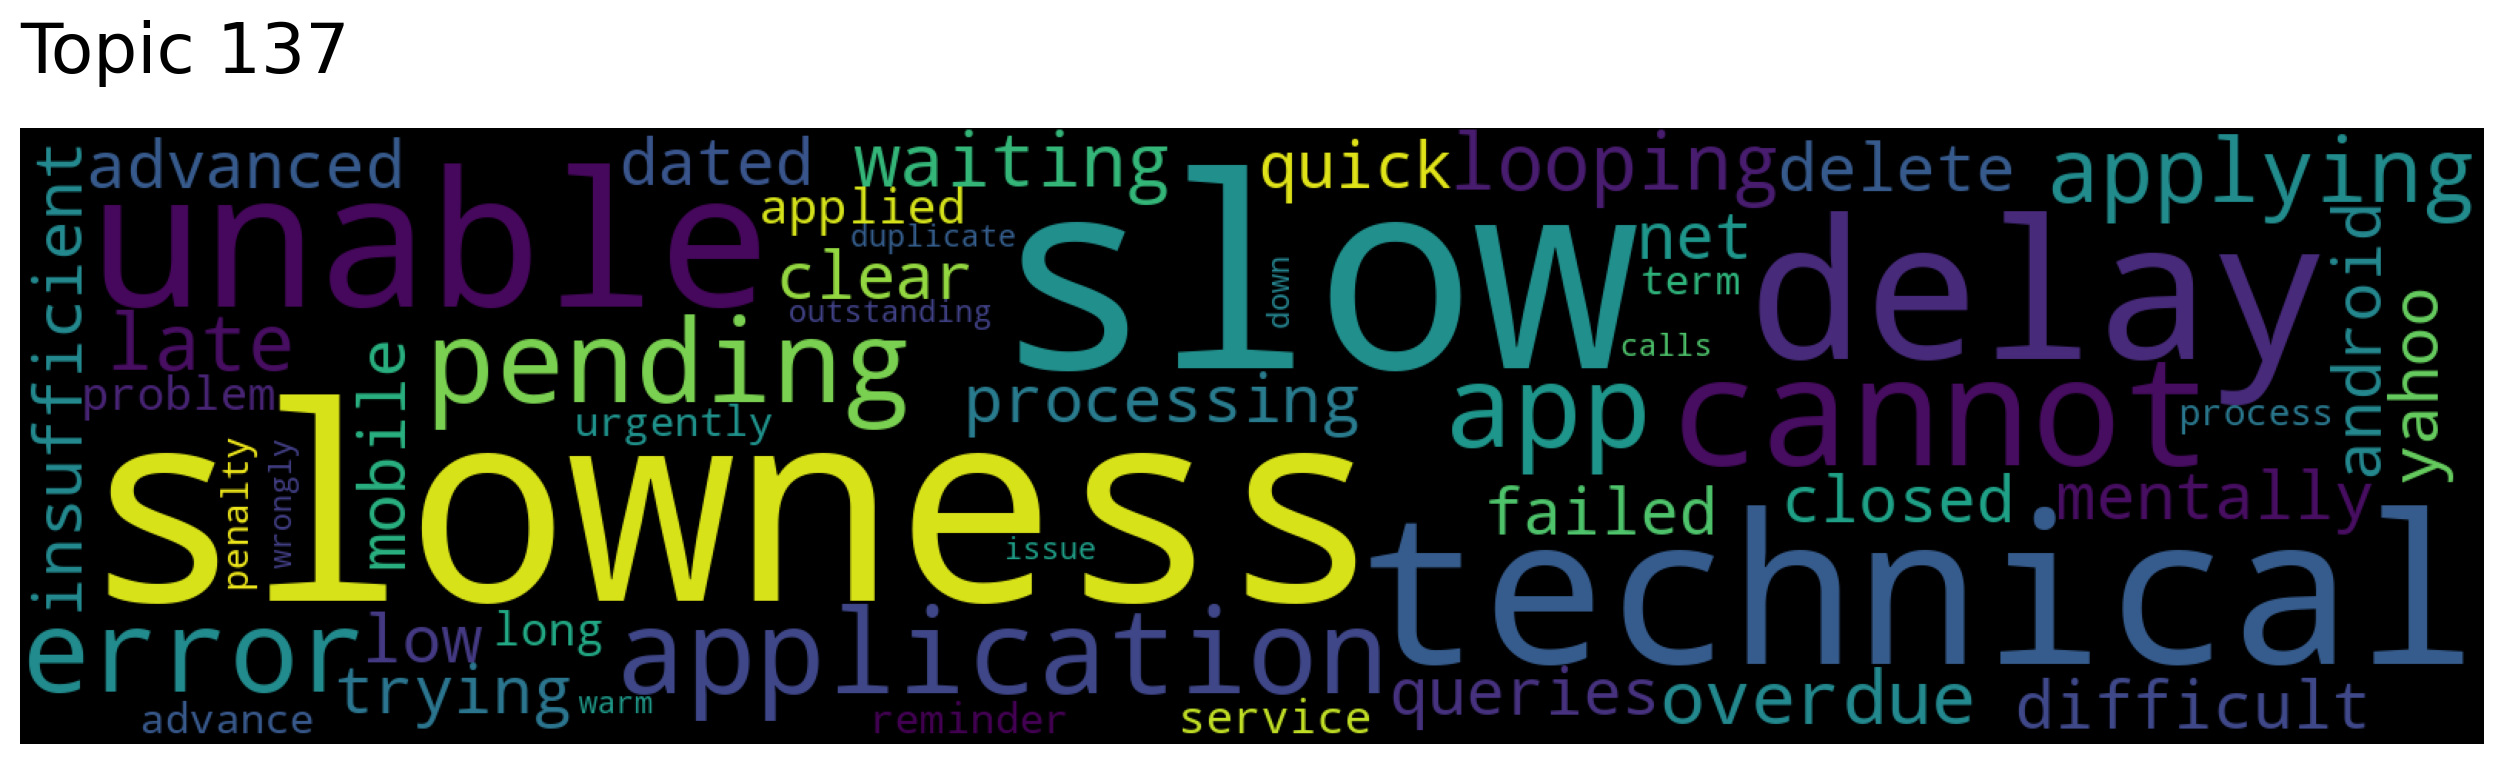

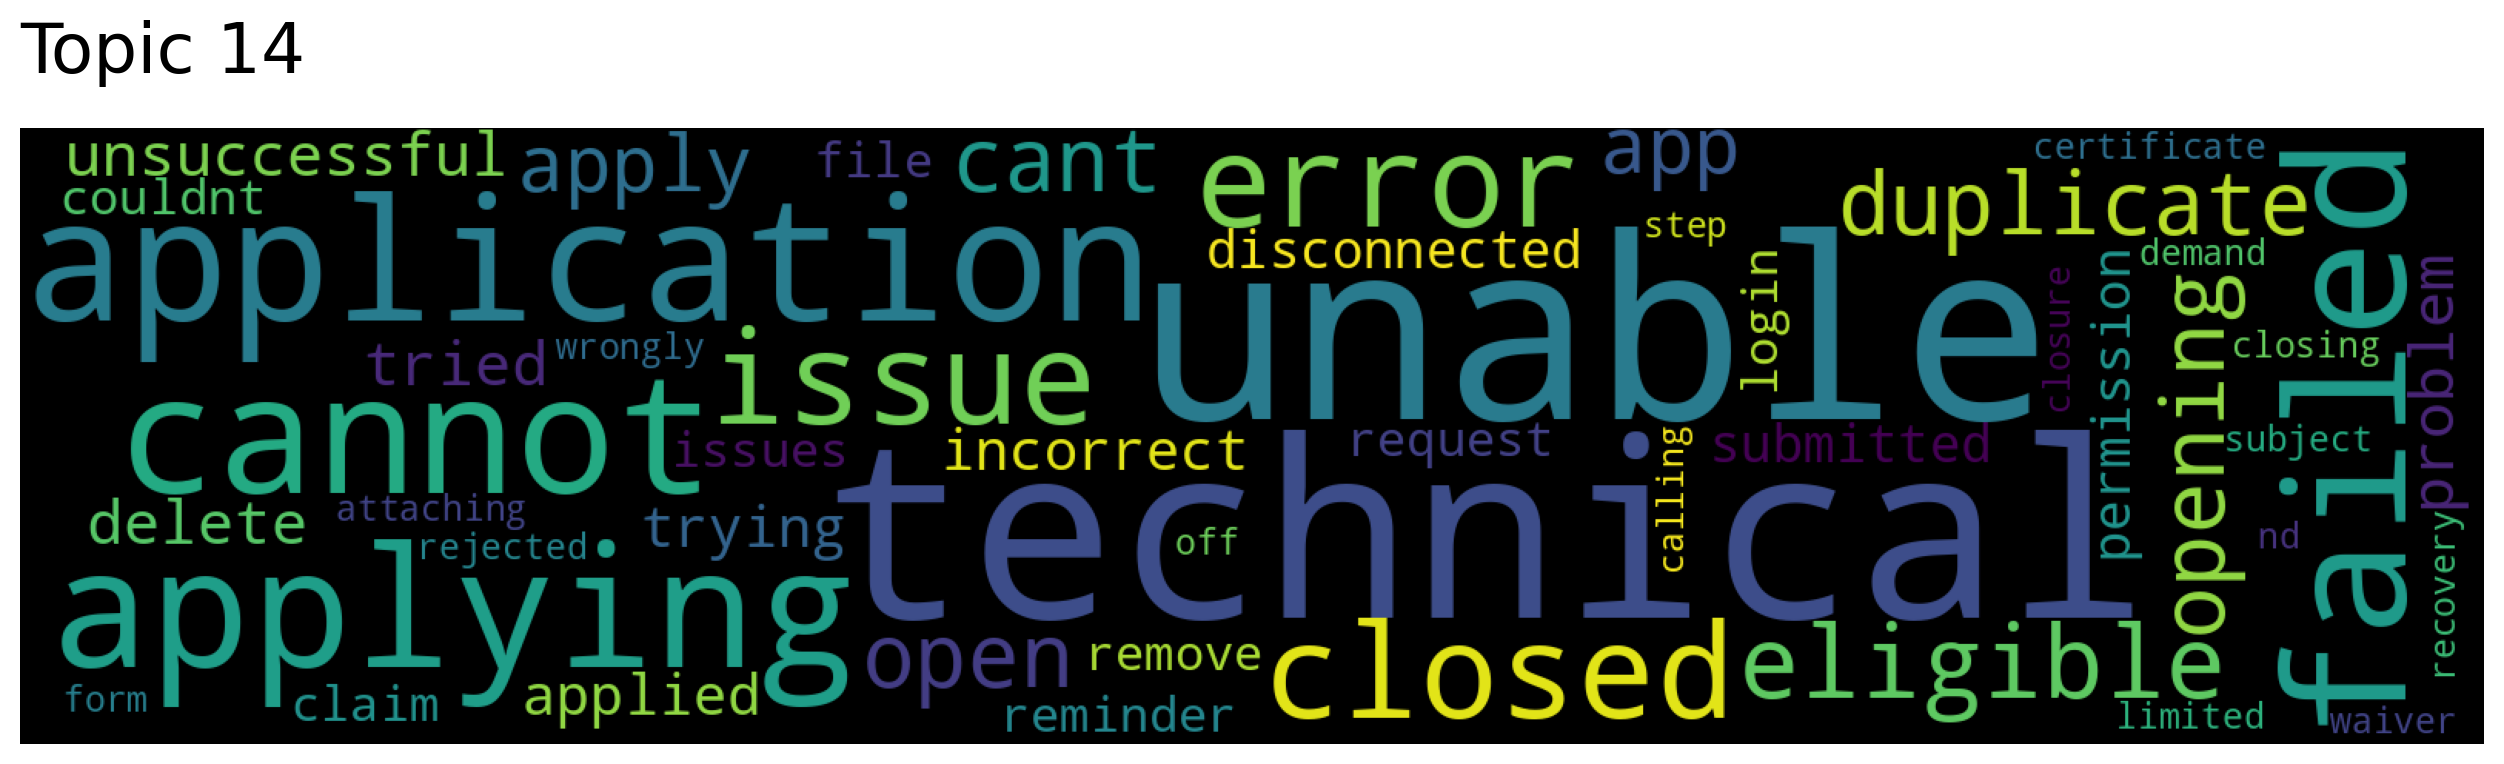

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["technical"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

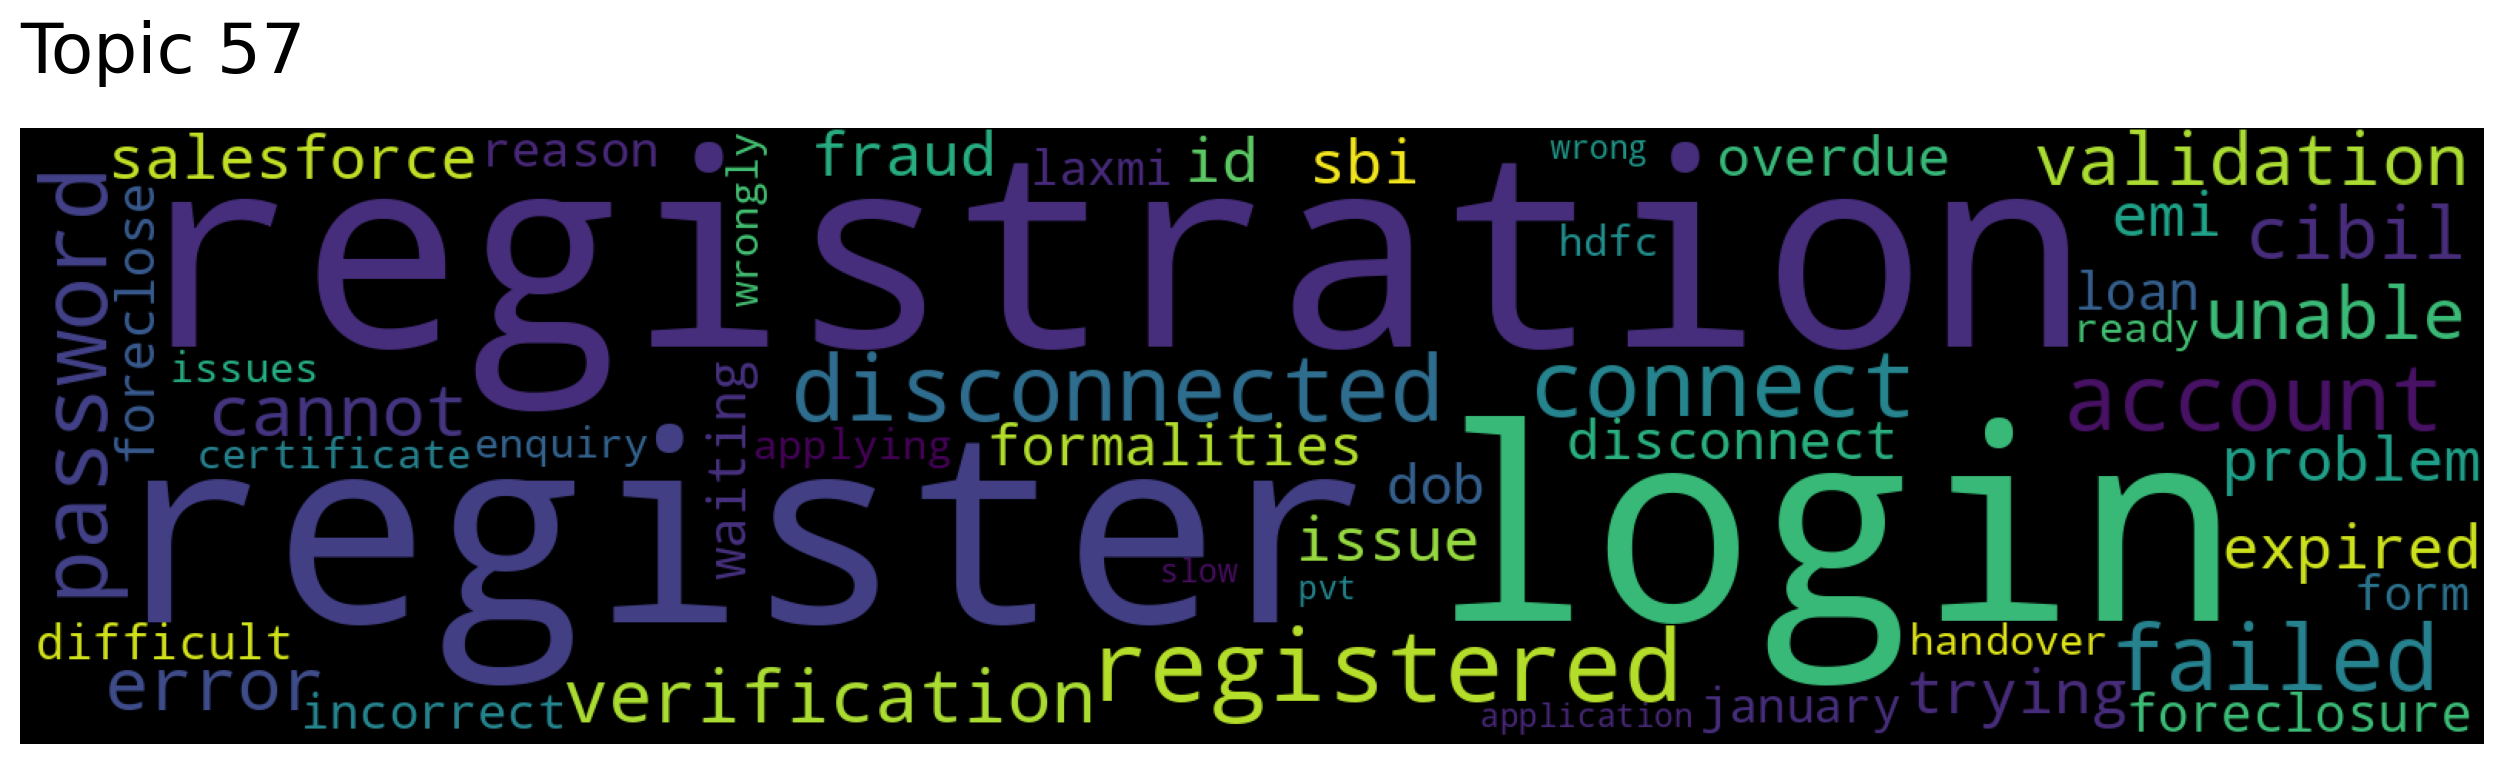

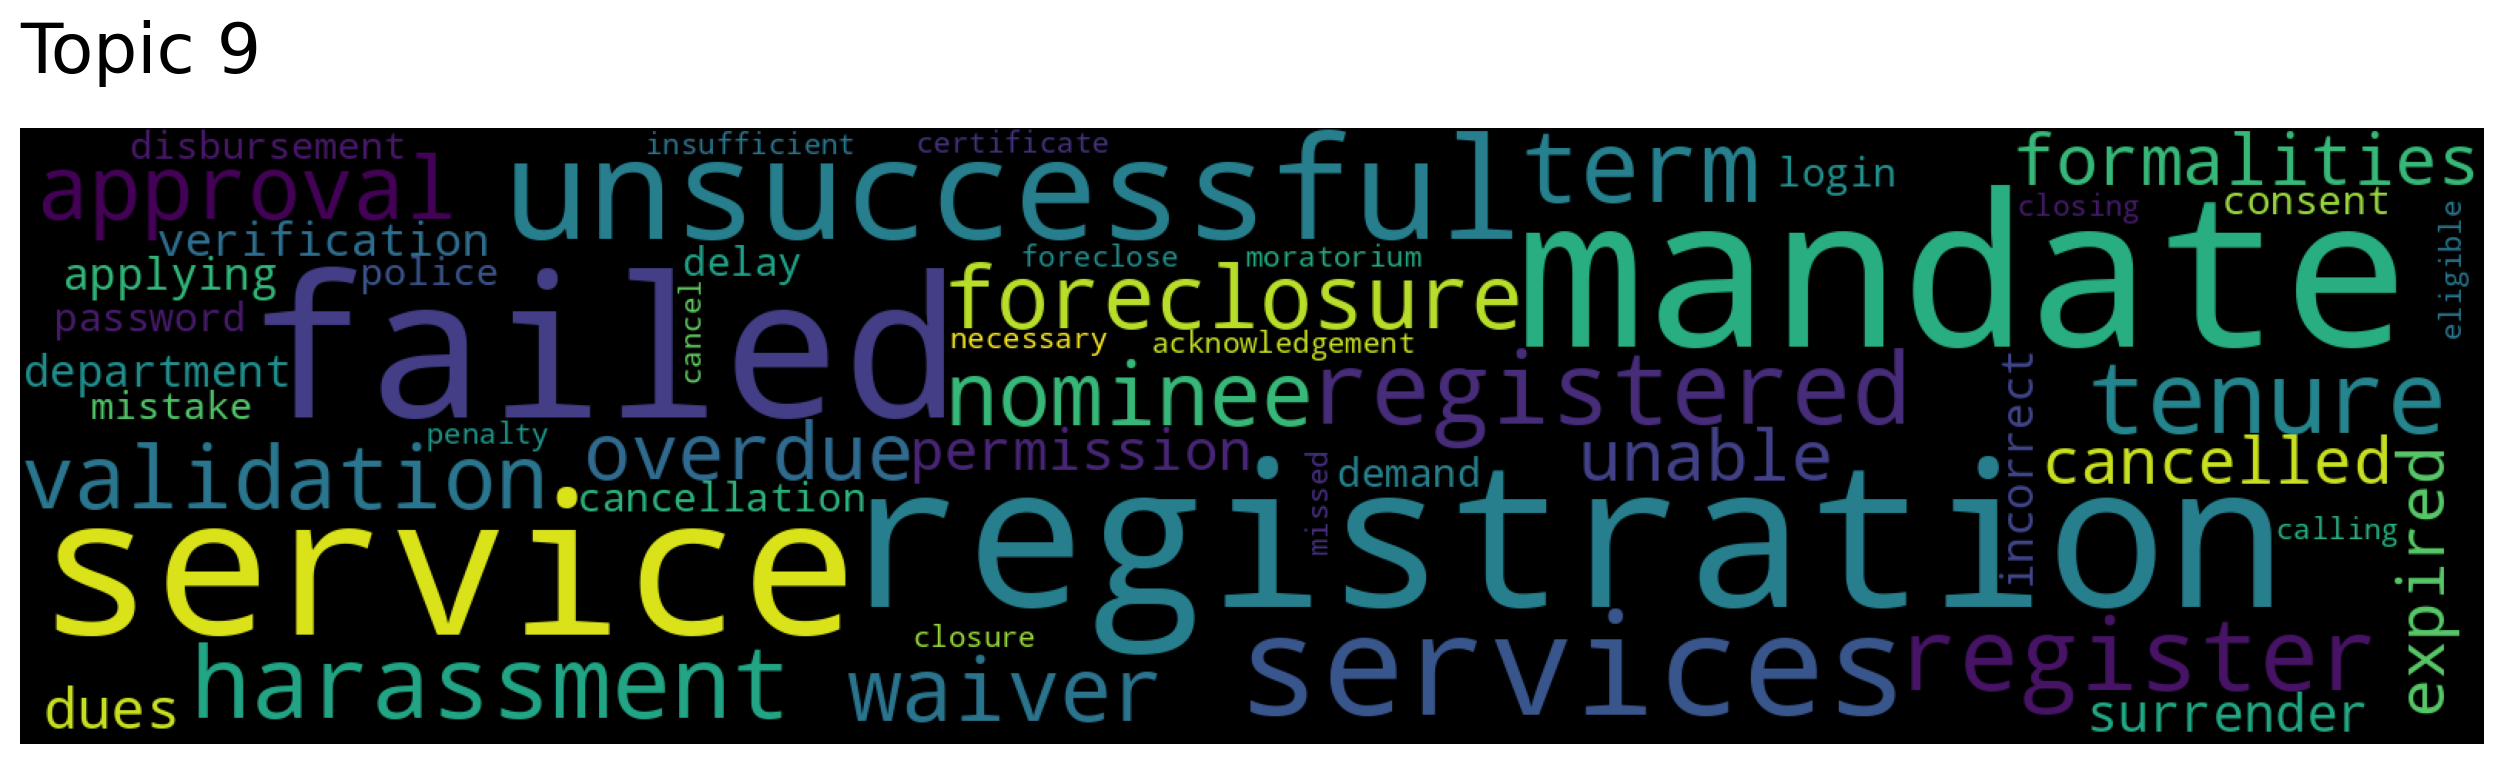

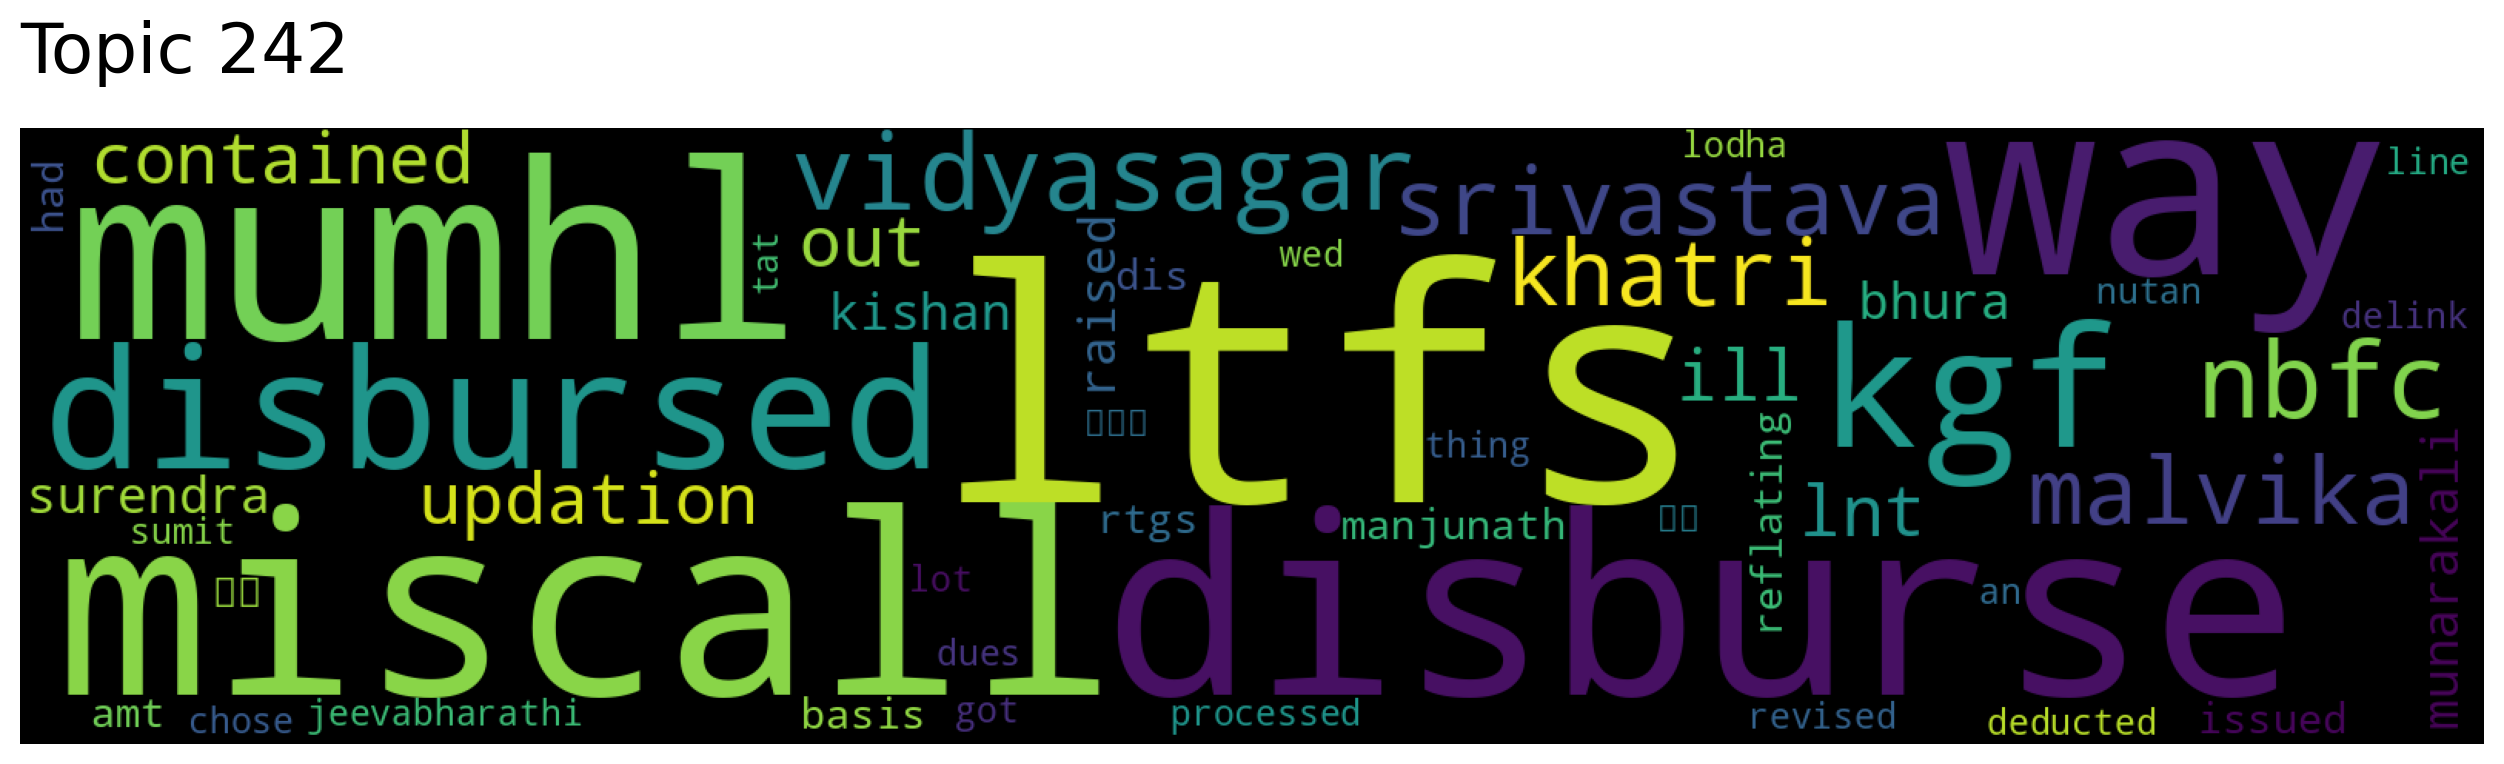

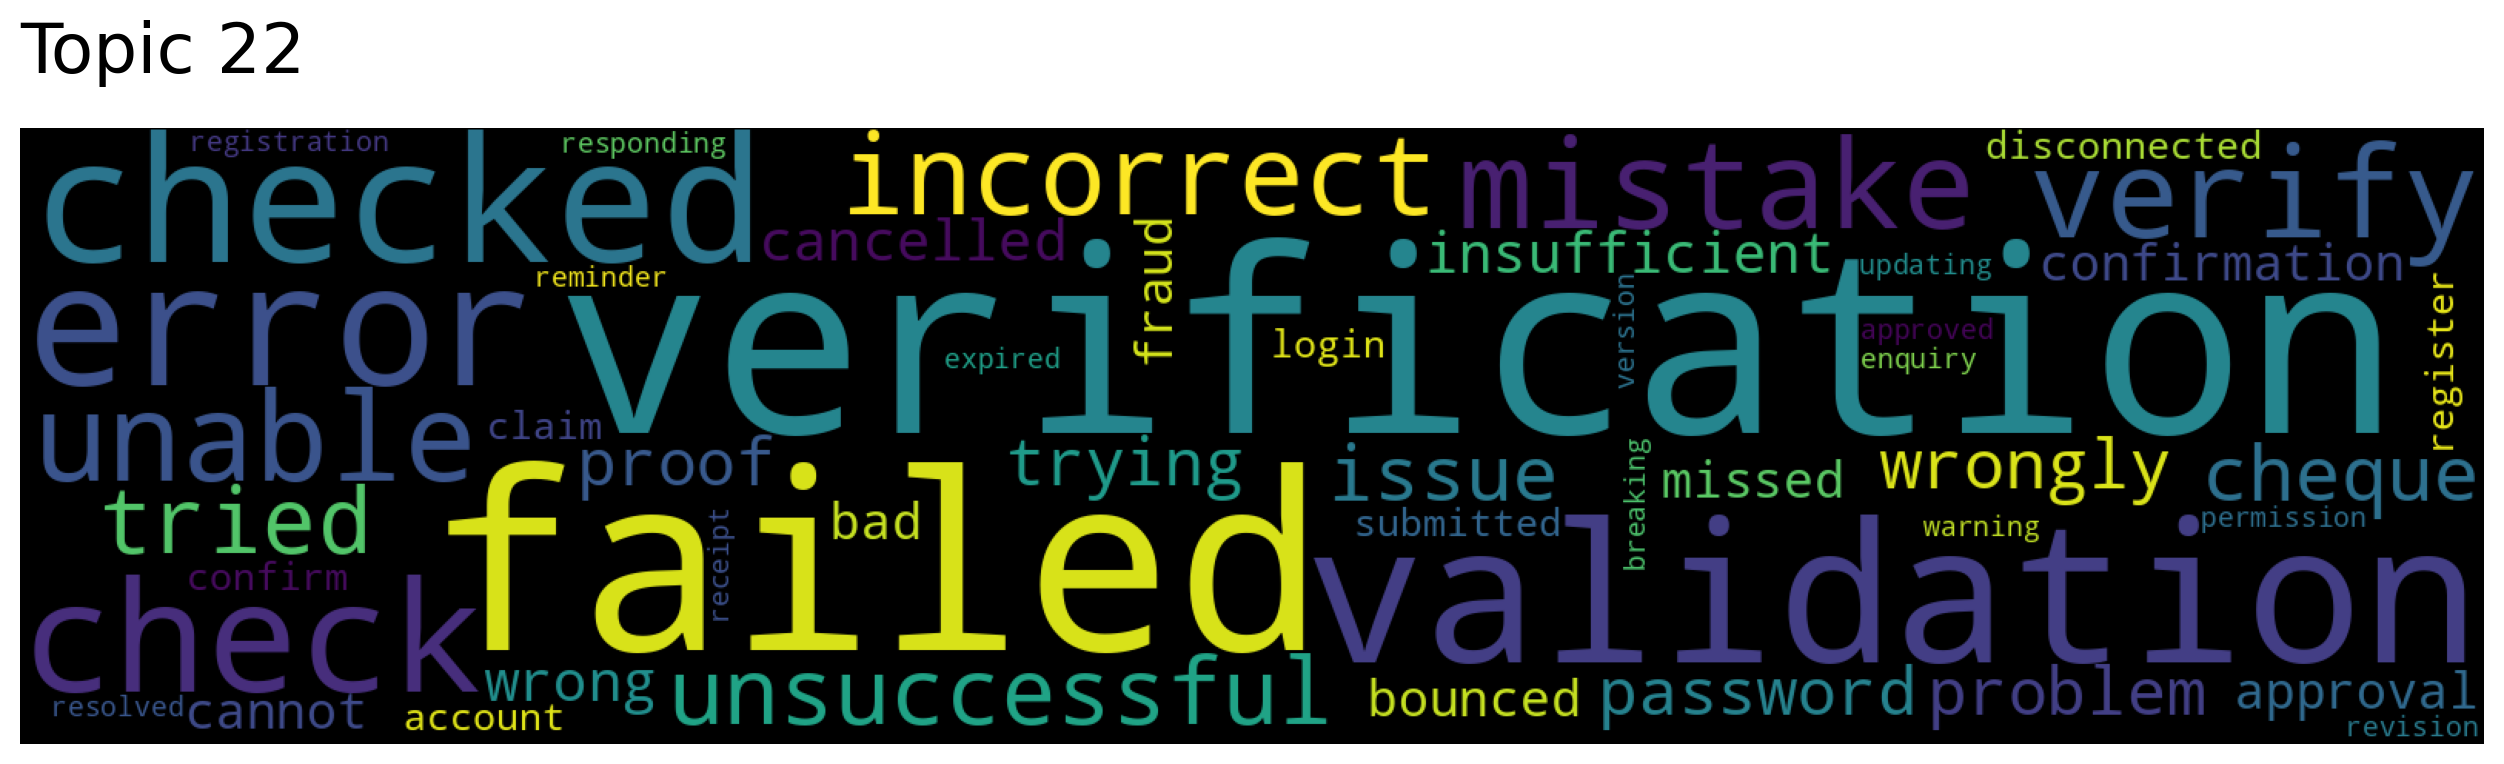

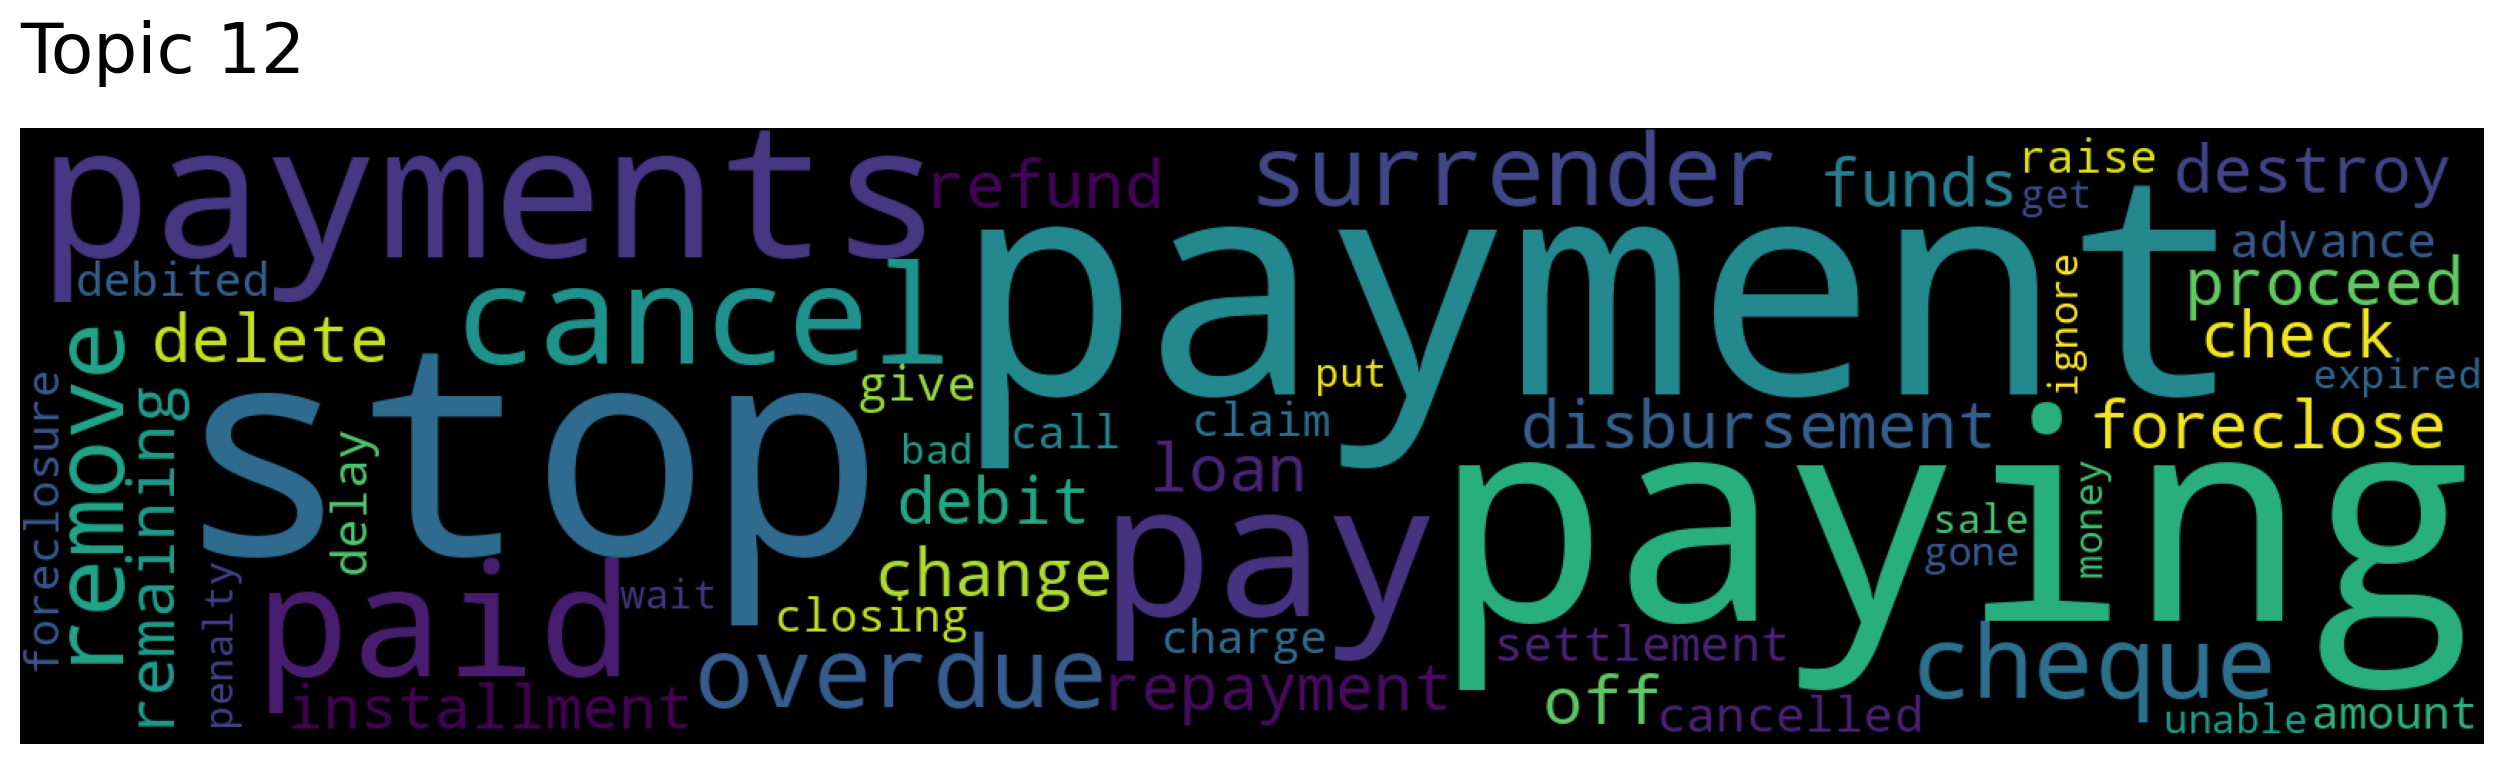

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["registration"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)